In [1]:
import pandas as pd

pca_processed_data = pd.read_csv('../data/pca-processed_heart_disease.csv')
pca_processed_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,condition
0,-0.039233,-0.253788,1.108265,-0.700899,0.301111,-0.839961,0.688526,-0.810877,0.156861,-0.207767,1.431996,0.352972,0.614194,0.381826,-0.038288,-0.145796,0
1,-1.141627,-0.809808,0.032225,0.344283,0.196894,-0.099172,-0.798856,-0.473560,-0.336210,0.258290,-0.100696,-0.555420,-0.648638,0.670350,0.226474,0.100075,1
2,-1.868282,-0.323053,0.121233,0.142862,0.052773,0.159603,0.079444,-0.003839,-0.069681,0.851798,-0.242212,0.014812,0.007963,-0.295652,0.084054,-0.171274,1
3,0.902116,0.610200,-0.081043,-0.617978,0.342487,-0.382084,-0.433267,0.038261,-0.507393,0.169220,0.991255,-0.374363,-0.248837,-0.561927,-0.284056,0.240965,0
4,1.298818,-0.884515,0.268812,0.469796,0.341791,0.323519,0.306327,0.118823,0.802930,0.027827,-0.051346,-0.174917,0.067726,-0.016932,-0.187003,0.061194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.241793,0.876853,-0.271537,-1.102780,0.547618,0.337560,0.207472,-0.028955,0.236387,0.073171,0.198052,0.836868,-0.197183,0.327486,-0.216300,-0.261663,1
299,-0.986426,0.690337,-0.198322,-0.710955,-0.726882,-0.074197,1.048600,-1.105459,-0.353621,0.195977,-0.270145,0.101315,-0.084849,-0.398143,0.198260,0.046050,1
300,-1.604664,0.756485,-0.672151,0.089254,-0.446223,0.180731,-0.535324,0.116328,0.152382,-0.331112,-0.020602,0.125362,-0.047554,-0.075621,0.018241,-0.055046,1
301,0.398393,-1.331490,-0.178727,-0.341713,-0.655132,0.767891,-0.481505,-0.246584,1.034815,-0.227725,-0.023999,-0.094172,-0.001797,-0.172947,-0.134631,0.111055,1


In [2]:
x = pca_processed_data.drop(columns=['condition'])
y = pca_processed_data['condition']

In [3]:
x.tail(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
298,-0.241793,0.876853,-0.271537,-1.102780,0.547618,0.337560,0.207472,-0.028955,0.236387,0.073171,0.198052,0.836868,-0.197183,0.327486,-0.216300,-0.261663
299,-0.986426,0.690337,-0.198322,-0.710955,-0.726882,-0.074197,1.048600,-1.105459,-0.353621,0.195977,-0.270145,0.101315,-0.084849,-0.398143,0.198260,0.046050
300,-1.604664,0.756485,-0.672151,0.089254,-0.446223,0.180731,-0.535324,0.116328,0.152382,-0.331112,-0.020602,0.125362,-0.047554,-0.075621,0.018241,-0.055046
301,0.398393,-1.331490,-0.178727,-0.341713,-0.655132,0.767891,-0.481505,-0.246584,1.034815,-0.227725,-0.023999,-0.094172,-0.001797,-0.172947,-0.134631,0.111055
302,1.261667,0.820988,0.186628,-0.121667,0.167830,-0.285049,-0.419214,0.218531,-0.504627,0.138983,-0.107781,-0.027781,0.020497,-0.043734,-0.121404,0.174976


In [4]:
y.tail(5)

298    1
299    1
300    1
301    1
302    0
Name: condition, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [6]:
from sklearn.ensemble import RandomForestClassifier

RF_model =  RandomForestClassifier(random_state=42, class_weight='balanced')
RF_model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
from sklearn.metrics import classification_report

y_pred = RF_model.predict(x_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.87      0.96      0.92        28

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



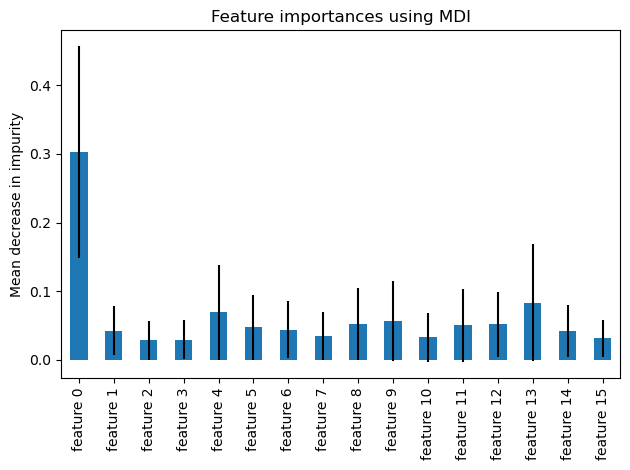

In [8]:
import numpy as np

importances = RF_model.feature_importances_
feature_names = [f"feature {i}" for i in range(x.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in RF_model.estimators_], axis=0)


import matplotlib.pyplot as plt
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [9]:
!conda install xgboost -y

2 channel Terms of Service accepted
Channels:
 - defaults
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [10]:
import xgboost as xgb

clf = xgb.XGBClassifier()
clf.fit(x_train, y_train)
print(clf.feature_importances_)

[0.3155953  0.03827477 0.0503226  0.03537875 0.08521754 0.05065937
 0.08100878 0.02144163 0.03615823 0.04268673 0.03610369 0.04424895
 0.06164426 0.0382223  0.0276796  0.03535751]


/home/mostafa-bakr/anaconda3/envs/Machine_Learning/lib/python3.13/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


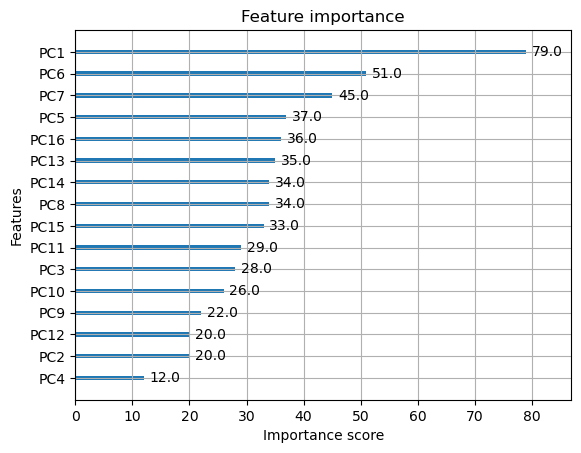

In [11]:
xgb.plot_importance(clf)
plt.show()

In [12]:
from sklearn.feature_selection import RFE, chi2
from sklearn.svm import SVC

estimator = SVC(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)
selector = selector.fit(x_train, y_train)
selector.support_

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [13]:
selector.ranking_

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

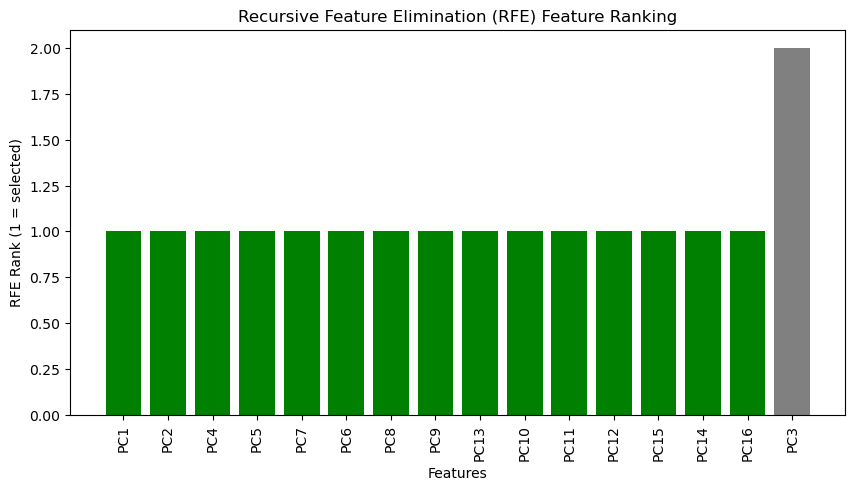

In [14]:
ranking = pd.DataFrame({
    "Feature": x_train.columns,
    "Rank": selector.ranking_
})

ranking["Selected"] = ranking["Rank"] == 1

ranking = ranking.sort_values("Rank")

plt.figure(figsize=(10,5))
colors = ["green" if sel else "gray" for sel in ranking["Selected"]]
plt.bar(ranking["Feature"], ranking["Rank"], color=colors)

plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("RFE Rank (1 = selected)")
plt.title("Recursive Feature Elimination (RFE) Feature Ranking")
plt.show()

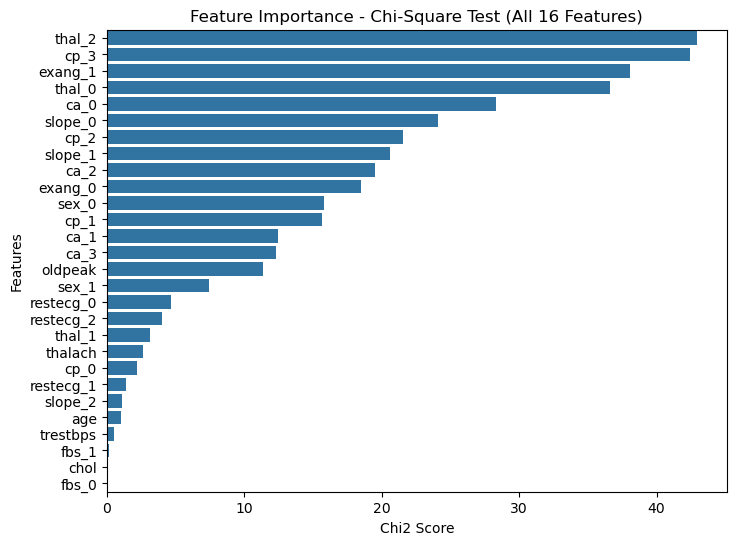

Chi2 Scores for all features:
thal_2       42.958360
cp_3         42.410097
exang_1      38.052613
thal_0       36.592219
ca_0         28.315601
slope_0      24.086540
cp_2         21.551109
slope_1      20.624160
ca_2         19.509795
exang_0      18.466709
sex_0        15.785218
cp_1         15.646367
ca_1         12.461167
ca_3         12.330323
oldpeak      11.382669
sex_1         7.432845
restecg_0     4.697130
restecg_2     3.987845
thal_1        3.133971
thalach       2.670638
cp_0          2.208198
restecg_1     1.366567
slope_2       1.073891
age           1.005896
trestbps      0.532647
fbs_1         0.164669
chol          0.111079
fbs_0         0.028721
dtype: float64


In [15]:
from sklearn.feature_selection import SelectKBest, chi2
import seaborn as sns


temp = pd.read_csv('../data/preprocessed_heart_disease.csv')

x_temp = temp.drop(columns=['condition'])
y_temp = temp['condition']

chi2_selector = SelectKBest(score_func=chi2, k=16)  
chi2_selector.fit(x_temp, y_temp)
chi2_scores = pd.Series(chi2_selector.scores_, index=x_temp.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=chi2_scores, y=chi2_scores.index)
plt.title("Feature Importance - Chi-Square Test (All 16 Features)")
plt.xlabel("Chi2 Score")
plt.ylabel("Features")
plt.show()

print("Chi2 Scores for all features:")
print(chi2_scores)


In [16]:
x = x.drop('PC3', axis=1)
x

,PC1,PC2,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-0.039233,-0.253788,-0.700899,0.301111,-0.839961,0.688526,-0.810877,0.156861,-0.207767,1.431996,0.352972,0.614194,0.381826,-0.038288,-0.145796
1,-1.141627,-0.809808,0.344283,0.196894,-0.099172,-0.798856,-0.473560,-0.336210,0.258290,-0.100696,-0.555420,-0.648638,0.670350,0.226474,0.100075
2,-1.868282,-0.323053,0.142862,0.052773,0.159603,0.079444,-0.003839,-0.069681,0.851798,-0.242212,0.014812,0.007963,-0.295652,0.084054,-0.171274
3,0.902116,0.610200,-0.617978,0.342487,-0.382084,-0.433267,0.038261,-0.507393,0.169220,0.991255,-0.374363,-0.248837,-0.561927,-0.284056,0.240965
4,1.298818,-0.884515,0.469796,0.341791,0.323519,0.306327,0.118823,0.802930,0.027827,-0.051346,-0.174917,0.067726,-0.016932,-0.187003,0.061194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.241793,0.876853,-1.102780,0.547618,0.337560,0.207472,-0.028955,0.236387,0.073171,0.198052,0.836868,-0.197183,0.327486,-0.216300,-0.261663
299,-0.986426,0.690337,-0.710955,-0.726882,-0.074197,1.048600,-1.105459,-0.353621,0.195977,-0.270145,0.101315,-0.084849,-0.398143,0.198260,0.046050
300,-1.604664,0.756485,0.089254,-0.446223,0.180731,-0.535324,0.116328,0.152382,-0.331112,-0.020602,0.125362,-0.047554,-0.075621,0.018241,-0.055046
301,0.398393,-1.331490,-0.341713,-0.655132,0.767891,-0.481505,-0.246584,1.034815,-0.227725,-0.023999,-0.094172,-0.001797,-0.172947,-0.134631,0.111055


In [17]:
y

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: condition, Length: 303, dtype: int64

In [18]:
final_processing_afterfeatureselection = pd.concat([x, y], axis=1)
final_processing_afterfeatureselection

,PC1,PC2,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,condition
0,-0.039233,-0.253788,-0.700899,0.301111,-0.839961,0.688526,-0.810877,0.156861,-0.207767,1.431996,0.352972,0.614194,0.381826,-0.038288,-0.145796,0
1,-1.141627,-0.809808,0.344283,0.196894,-0.099172,-0.798856,-0.473560,-0.336210,0.258290,-0.100696,-0.555420,-0.648638,0.670350,0.226474,0.100075,1
2,-1.868282,-0.323053,0.142862,0.052773,0.159603,0.079444,-0.003839,-0.069681,0.851798,-0.242212,0.014812,0.007963,-0.295652,0.084054,-0.171274,1
3,0.902116,0.610200,-0.617978,0.342487,-0.382084,-0.433267,0.038261,-0.507393,0.169220,0.991255,-0.374363,-0.248837,-0.561927,-0.284056,0.240965,0
4,1.298818,-0.884515,0.469796,0.341791,0.323519,0.306327,0.118823,0.802930,0.027827,-0.051346,-0.174917,0.067726,-0.016932,-0.187003,0.061194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.241793,0.876853,-1.102780,0.547618,0.337560,0.207472,-0.028955,0.236387,0.073171,0.198052,0.836868,-0.197183,0.327486,-0.216300,-0.261663,1
299,-0.986426,0.690337,-0.710955,-0.726882,-0.074197,1.048600,-1.105459,-0.353621,0.195977,-0.270145,0.101315,-0.084849,-0.398143,0.198260,0.046050,1
300,-1.604664,0.756485,0.089254,-0.446223,0.180731,-0.535324,0.116328,0.152382,-0.331112,-0.020602,0.125362,-0.047554,-0.075621,0.018241,-0.055046,1
301,0.398393,-1.331490,-0.341713,-0.655132,0.767891,-0.481505,-0.246584,1.034815,-0.227725,-0.023999,-0.094172,-0.001797,-0.172947,-0.134631,0.111055,1


In [19]:
final_processing_afterfeatureselection.to_csv('../data/final_processing_afterfeatureselection.csv', index=False)